<a href="https://colab.research.google.com/github/jmorral/nyu-python-public-policy/blob/master/HW6_long_way.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Problem Statement: Some 311 complaint types have interesting trends over time. Some are more prevalent at certain times of day, days of the week, seasons, etc. In this homework you will isolate the 10 most common complaint types and look at trends in when they occur.

Step 1. Create a list of the top 10 complaint types (i.e. the complaint type categories that have the most records in our 311 dataset). Save the list as an object called top_10.

In [4]:
top_10 = df.groupby('complaint_type').size().nlargest(10).reset_index(name='count')
print(top_10)

                        complaint_type   count
0                  Noise - Residential  236350
1                       HEAT/HOT WATER  205985
2                      Illegal Parking  195159
3  Request Large Bulky Item Collection  177175
4                     Blocked Driveway  145446
5              Noise - Street/Sidewalk   95977
6                     Street Condition   93341
7                 UNSANITARY CONDITION   81713
8                         Water System   70509
9                                Noise   59007


Step 2. Filter the 311 dataset to only 311 requests that have complaint types in top_10. Save this subset of data as a dataframe called filtered_311.

In [5]:
filtered_311 = df[df.complaint_type.isin(top_10.complaint_type)]
filtered_311.head(10) #checking

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0
5,5,5,39882413,08/01/2018 12:01:09 AM,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0
6,6,6,39884833,08/01/2018 12:01:10 AM,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0
8,8,8,39887285,08/01/2018 12:03:13 AM,08/01/2018 08:13:06 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11213,1139 SAINT MARKS AVENUE,SAINT MARKS AVENUE,SCHENECTADY AVENUE,UTICA AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:03:13 AM,The Police Department responded and upon arriv...,08/01/2018 08:13:06 AM,08 BROOKLYN,3.013540e+09,BROOKLYN,1003110.0,184925.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674233,-73.932009,"(40.674233069283225, -73.9320085867278)",308.0
9,9,9,39885757,08/01/2018 12:03:54 AM,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10040,NaN,NaN,NaN,NaN,AUDUBON AVENUE,WEST 1

Step 3. Convert the created_date column in filtered_311 to be a datetime series.

In [6]:
filtered_311.created_date = pd.to_datetime(df.created_date, format = '%m/%d/%Y %I:%M:%S %p')
filtered_311.dtypes #checking. It worked.

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Unnamed: 0                                 int64
Unnamed: 0.1                               int64
unique_key                                 int64
created_date                      datetime64[ns]
closed_date                               object
agency                                    object
agency_name                               object
complaint_type                            object
descriptor                                object
location_type                             object
incident_zip                              object
incident_address                          object
street_name                               object
cross_street_1                            object
cross_street_2                            object
intersection_street_1                     object
intersection_street_2                     object
address_type                              object
city                                      object
landmark                                  object
facility_type       

Step 4. Create 6 new columns in filtered_311 that extract each of the following from created_date

*   year
*   date
*   month
*   weekday
*   weekday_name
*   hour





In [0]:
filtered_311['year'] = filtered_311.created_date.dt.year
filtered_311['date'] = filtered_311.created_date.dt.date
filtered_311['month'] = filtered_311.created_date.dt.month
filtered_311['weekday'] = filtered_311.created_date.dt.weekday
filtered_311['weekday_name'] = filtered_311.created_date.dt.weekday_name
filtered_311['hour'] = filtered_311.created_date.dt.hour

filtered_311.head()

Step 5. Trends by hour



Find the count of 311 requests per hour and date for each complaint type:

Hint: Use the pandas groupby function to aggregate the filtered_311 dataframe by hour, date, and complaint_type and count the number of 311 requests. Save the result as a new dataframe.

Find the median count of 311 requests per hour for each complaint type:

Hint: Group the new dataframe from Step A by hour and complaint type, getting the median of the counts across all the dates in each group. Save the result as a new dataframe.
Produce a line plot that has 10 lines on it, one for each of the top 10 complaint types. The x values will be hours and the y values will be the median count of requests per complaint type. Use a for loop to produce the 10 lines all one one figure. 

In [0]:
count_top10_hour_date = filtered_311.groupby(['hour', 'date', 'complaint_type']).size().reset_index(name='count_requests')
count_top10_hour_date.head(15)

In [9]:
median_top10_hour = count_top10_hour_date.groupby(['hour', 'complaint_type'])['count_requests'].median().reset_index(name='median_requests')
median_top10_hour

,hour,complaint_type,median_requests
0,0,Blocked Driveway,13.0
1,0,HEAT/HOT WATER,11.0
2,0,Illegal Parking,15.0
3,0,Noise,6.0
4,0,Noise - Residential,41.0
5,0,Noise - Street/Sidewalk,15.0
6,0,Request Large Bulky Item Collection,5.0
7,0,Street Condition,3.0
8,0,UNSANITARY CONDITION,3.0
9,0,Water System,2.0


In [0]:
# Here I need to make numpy arrays based on subset by complaint_type
noise_res_np = [np.array(median_top10_hour[median_top10_hour.complaint_type == 'Noise - Residential'].hour), np.array(median_top10_hour[median_top10_hour.complaint_type == 'Noise - Residential'].median_requests)]
hhw_np = [np.array(median_top10_hour[median_top10_hour.complaint_type == 'HEAT/HOT WATER'].hour), np.array(median_top10_hour[median_top10_hour.complaint_type == 'HEAT/HOT WATER'].median_requests)]
ill_park_np = [np.array(median_top10_hour[median_top10_hour.complaint_type == 'Illegal Parking'].hour), np.array(median_top10_hour[median_top10_hour.complaint_type == 'Illegal Parking'].median_requests)]
bulky_item_np = [np.array(median_top10_hour[median_top10_hour.complaint_type == 'Request Large Bulky Item Collection'].hour), np.array(median_top10_hour[median_top10_hour.complaint_type == 'Request Large Bulky Item Collection'].median_requests)]
block_drwy_np = [np.array(median_top10_hour[median_top10_hour.complaint_type == 'Blocked Driveway'].hour), np.array(median_top10_hour[median_top10_hour.complaint_type == 'Blocked Driveway'].median_requests)]
noise_str_sw_np = [np.array(median_top10_hour[median_top10_hour.complaint_type == 'Noise - Street/Sidewalk'].hour), np.array(median_top10_hour[median_top10_hour.complaint_type == 'Noise - Street/Sidewalk'].median_requests)]
str_cond_np = [np.array(median_top10_hour[median_top10_hour.complaint_type == 'Street Condition'].hour), np.array(median_top10_hour[median_top10_hour.complaint_type == 'Street Condition'].median_requests)]
unsani_cond_np = [np.array(median_top10_hour[median_top10_hour.complaint_type == 'UNSANITARY CONDITION'].hour), np.array(median_top10_hour[median_top10_hour.complaint_type == 'UNSANITARY CONDITION'].median_requests)]
h2o_sys_np = [np.array(median_top10_hour[median_top10_hour.complaint_type == 'Water System'].hour), np.array(median_top10_hour[median_top10_hour.complaint_type == 'Water System'].median_requests)]
noise_gen_np = [np.array(median_top10_hour[median_top10_hour.complaint_type == 'Noise'].hour), np.array(median_top10_hour[median_top10_hour.complaint_type == 'Noise'].median_requests)]

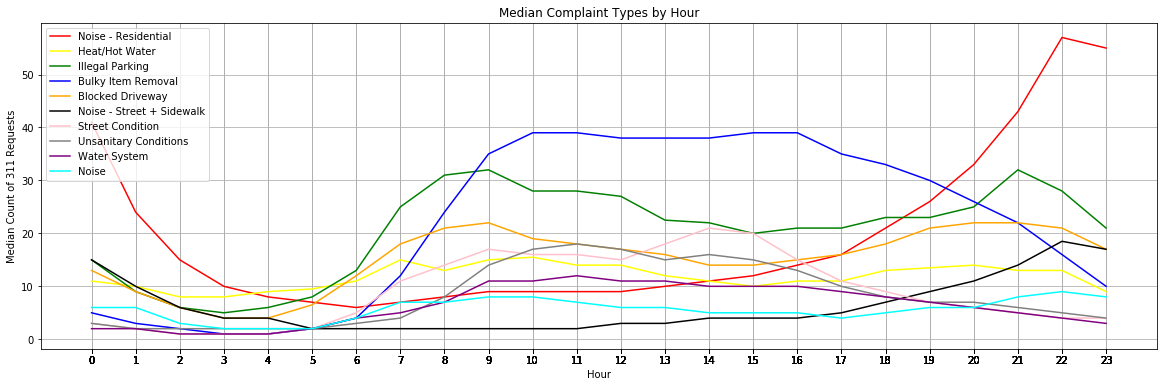

In [12]:
#plot recipe
# x = hours; y = median counts
data_per_complaint_type = [noise_res_np, hhw_np, ill_park_np, bulky_item_np, block_drwy_np, noise_str_sw_np, str_cond_np, unsani_cond_np, h2o_sys_np, noise_gen_np]
colors = ["red", "yellow", "green", "blue", "orange", "black", "pink", "grey", "purple", "cyan"]
groups = ['Noise - Residential', 'Heat/Hot Water', 'Illegal Parking', 'Bulky Item Removal', 'Blocked Driveway', 'Noise - Street + Sidewalk', 'Street Condition', 'Unsanitary Conditions', 'Water System', 'Noise']

plt.figure(figsize=(20, 6))

for dataset, colors, group in zip(data_per_complaint_type, colors, groups):
  x = dataset[0]
  y = dataset[1]
  plt.plot(x, y, color = colors, label = group)
  plt.xticks(median_top10_hour.hour)


plt.grid()
plt.title('Median Complaint Types by Hour')
plt.xlabel('Hour')
plt.ylabel('Median Count of 311 Requests')
plt.legend(loc = 'best')


Step 6. Trends by day of week

Reproduce the steps in 5, but this time aggregate by weekday, date, and complaint_type. Produce a similar plot where the x values will be the days of the week and the y values will be the median count of requests per complaint type

In [0]:
count_top10_weekday_date = filtered_311.groupby(['weekday', 'date', 'complaint_type']).size().reset_index(name='count_requests')
median_top10_weekday = count_top10_weekday_date.groupby(['weekday', 'complaint_type'])['count_requests'].median().reset_index(name='median_requests')

# Here I need to make numpy arrays based on subset by complaint_type
noise_res_weekday_np = [np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Noise - Residential'].weekday), np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Noise - Residential'].median_requests)]
hhw_weekday_np = [np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'HEAT/HOT WATER'].weekday), np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'HEAT/HOT WATER'].median_requests)]
ill_park_weekday_np = [np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Illegal Parking'].weekday), np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Illegal Parking'].median_requests)]
bulky_item_weekday_np = [np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Request Large Bulky Item Collection'].weekday), np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Request Large Bulky Item Collection'].median_requests)]
block_drwy_weekday_np = [np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Blocked Driveway'].weekday), np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Blocked Driveway'].median_requests)]
noise_str_sw_weekday_np = [np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Noise - Street/Sidewalk'].weekday), np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Noise - Street/Sidewalk'].median_requests)]
str_cond_weekday_np = [np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Street Condition'].weekday), np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Street Condition'].median_requests)]
unsani_cond_weekday_np = [np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'UNSANITARY CONDITION'].weekday), np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'UNSANITARY CONDITION'].median_requests)]
h2o_sys_weekday_np = [np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Water System'].weekday), np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Water System'].median_requests)]
noise_gen_weekday_np = [np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Noise'].weekday), np.array(median_top10_weekday[median_top10_weekday.complaint_type == 'Noise'].median_requests)]

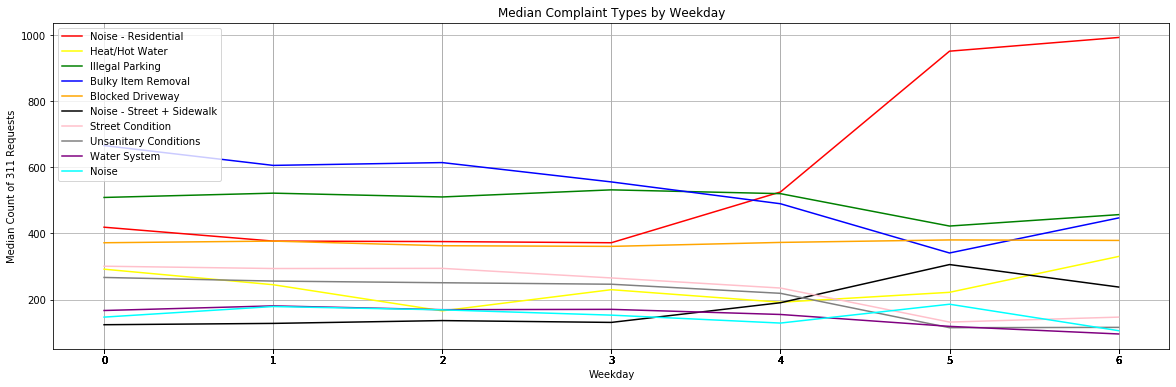

In [14]:
#plot recipe
# x = hours; y = median counts
data_per_complaint_type = [noise_res_weekday_np, hhw_weekday_np, ill_park_weekday_np, bulky_item_weekday_np, block_drwy_weekday_np, noise_str_sw_weekday_np, str_cond_weekday_np, unsani_cond_weekday_np, h2o_sys_weekday_np, noise_gen_weekday_np]
colors = ["red", "yellow", "green", "blue", "orange", "black", "pink", "grey", "purple", "cyan"]
groups = ['Noise - Residential', 'Heat/Hot Water', 'Illegal Parking', 'Bulky Item Removal', 'Blocked Driveway', 'Noise - Street + Sidewalk', 'Street Condition', 'Unsanitary Conditions', 'Water System', 'Noise']

plt.figure(figsize=(20, 6))

for dataset, colors, group in zip(data_per_complaint_type, colors, groups):
  x = dataset[0]
  y = dataset[1]
  plt.plot(x, y, color = colors, label = group)
  plt.xticks(median_top10_weekday.weekday)


plt.grid()
plt.title('Median Complaint Types by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Median Count of 311 Requests')
plt.legend(loc = 2)


Step 7. Trends by month

Reproduce the steps in 5, but this time aggregate by month, year (not date), and complaint_type. Produce a similar plot where x values will be month and y values will be the median count of requests per complaint type

In [0]:
count_top10_month_date = filtered_311.groupby(['month', 'year', 'complaint_type']).size().reset_index(name='count_requests')
median_top10_month = count_top10_month_date.groupby(['month', 'complaint_type'])['count_requests'].median().reset_index(name='median_requests')

# Here I need to make numpy arrays based on subset by complaint_type
noise_res_month_np = [np.array(median_top10_month[median_top10_month.complaint_type == 'Noise - Residential'].month), np.array(median_top10_month[median_top10_month.complaint_type == 'Noise - Residential'].median_requests)]
hhw_month_np = [np.array(median_top10_month[median_top10_month.complaint_type == 'HEAT/HOT WATER'].month), np.array(median_top10_month[median_top10_month.complaint_type == 'HEAT/HOT WATER'].median_requests)]
ill_park_month_np = [np.array(median_top10_month[median_top10_month.complaint_type == 'Illegal Parking'].month), np.array(median_top10_month[median_top10_month.complaint_type == 'Illegal Parking'].median_requests)]
bulky_item_month_np = [np.array(median_top10_month[median_top10_month.complaint_type == 'Request Large Bulky Item Collection'].month), np.array(median_top10_month[median_top10_month.complaint_type == 'Request Large Bulky Item Collection'].median_requests)]
block_drwy_month_np = [np.array(median_top10_month[median_top10_month.complaint_type == 'Blocked Driveway'].month), np.array(median_top10_month[median_top10_month.complaint_type == 'Blocked Driveway'].median_requests)]
noise_str_sw_month_np = [np.array(median_top10_month[median_top10_month.complaint_type == 'Noise - Street/Sidewalk'].month), np.array(median_top10_month[median_top10_month.complaint_type == 'Noise - Street/Sidewalk'].median_requests)]
str_cond_month_np = [np.array(median_top10_month[median_top10_month.complaint_type == 'Street Condition'].month), np.array(median_top10_month[median_top10_month.complaint_type == 'Street Condition'].median_requests)]
unsani_cond_month_np = [np.array(median_top10_month[median_top10_month.complaint_type == 'UNSANITARY CONDITION'].month), np.array(median_top10_month[median_top10_month.complaint_type == 'UNSANITARY CONDITION'].median_requests)]
h2o_sys_month_np = [np.array(median_top10_month[median_top10_month.complaint_type == 'Water System'].month), np.array(median_top10_month[median_top10_month.complaint_type == 'Water System'].median_requests)]
noise_gen_month_np = [np.array(median_top10_month[median_top10_month.complaint_type == 'Noise'].month), np.array(median_top10_month[median_top10_month.complaint_type == 'Noise'].median_requests)]

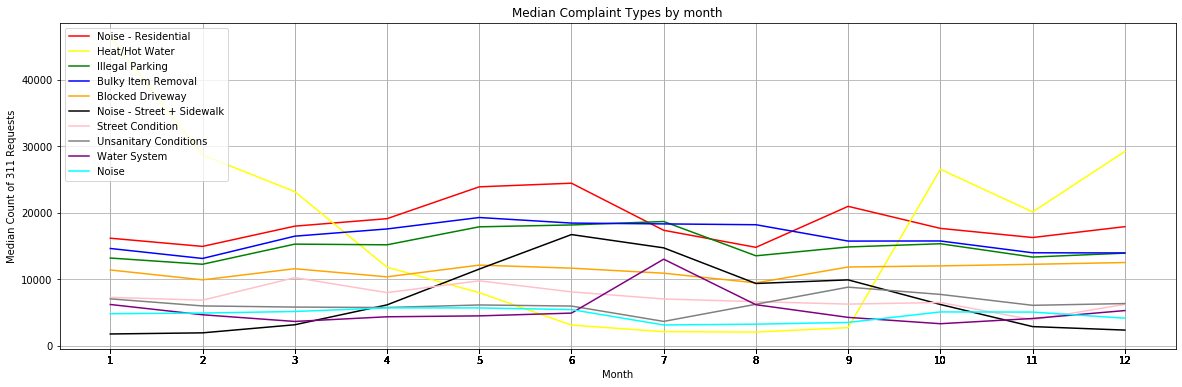

In [16]:
#plot recipe
# x = hours; y = median counts
data_per_complaint_type = [noise_res_month_np, hhw_month_np, ill_park_month_np, bulky_item_month_np, block_drwy_month_np, noise_str_sw_month_np, str_cond_month_np, unsani_cond_month_np, h2o_sys_month_np, noise_gen_month_np]
colors = ["red", "yellow", "green", "blue", "orange", "black", "pink", "grey", "purple", "cyan"]
groups = ['Noise - Residential', 'Heat/Hot Water', 'Illegal Parking', 'Bulky Item Removal', 'Blocked Driveway', 'Noise - Street + Sidewalk', 'Street Condition', 'Unsanitary Conditions', 'Water System', 'Noise']

plt.figure(figsize=(20, 6))

for dataset, colors, group in zip(data_per_complaint_type, colors, groups):
  x = dataset[0]
  y = dataset[1]
  plt.plot(x, y, color = colors, label = group)
  plt.xticks(median_top10_month.month)


plt.grid()
plt.title('Median Complaint Types by month')
plt.xlabel('Month')
plt.ylabel('Median Count of 311 Requests')
plt.legend(loc = 2)

Step 8. Write a few sentences with your observations on how the occurrence of different complaint types varies over time, informed by the charts you produced in Steps 5-7.

Step 8 Answer:
Looking at complaint types by hour, it makes sense, and is also amusing to "Noise Residential" begin to rise at 1800 hours and then decrease again after the start of a new day (hour 0-3). The time, by hour, is also indicative of when people notice things. Illegal parking (green) and blocked driveway (orange) both spike sharply beginning at 600 hours, because people are trying to go to work. Similar occurence with Bulky item removable (my blue line), either residents or neighbors are noticing things and reporting them. These are the ones that stick out the most to me. For weekday, illegal parking drops off a little on the weekend because of less people going to work. Again, amusing, beginning Friday into Sunday the red line (Noise - Residential) spikes. Probably because some people are having parties or other loud weekend activities. Another interesting one is Bulky item (blue). It is highest on Monday and then decreases. Are people motivated to clean out their homes over the weekend and therefore need items to be taken away? It's curious how Blocked Driveway is nearly constant. At first I thought that my plot was wrong, but the line is changing though very little. For the month plot. It's cold in January, February, and March so people are more sensitive to their heat/hot water issues (yellow). Also, due to weather fluctuations in the fall in NYC, the yellow line zigzags for September, October, November and December. Noise Residential increases starting in April and then decreases after a bump in September. The weather is nicer and people are outside grilling, having get together, etc. Noise street sidewalk (black) supports this too but not as strongly. Bulky items pick up in March (Spring cleaning?) hold steady through summer and then drop off after August. Are folks discarding their old ACs? Water system is the purple line and it has a peak in July which also tends to be the hottest and sometimes, driest month. 